# Zomato Data Analysis Project

Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating Data Frame

In [5]:
df=pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Convert data in Rating

In [11]:
def handleRate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [13]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


### Type of Resturent

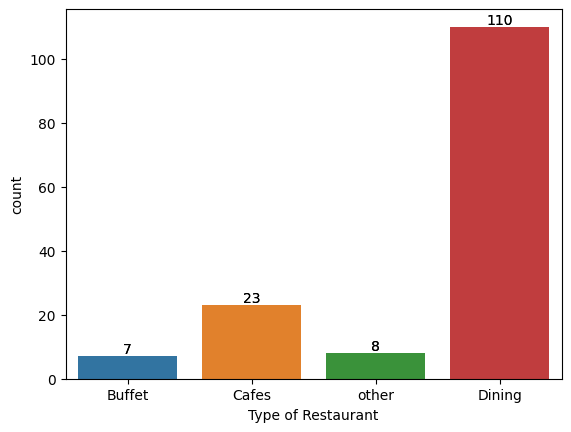

In [19]:
sns.countplot(x=df['listed_in(type)'])
ax = sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")
# Add data labels
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Mejority of Restaurant Falls in Dining Category

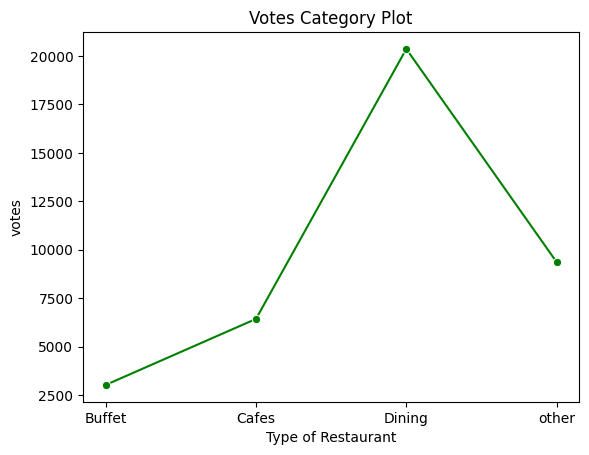

In [37]:
grouped = df.groupby('listed_in(type)')['votes'].sum().reset_index()
sns.lineplot(data=grouped, x="listed_in(type)",y='votes',marker="o",color='g')
plt.title("Votes Category Plot")
plt.xlabel("Type of Restaurant")
plt.show()

Dinning restaurent have maximum votes

In [39]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


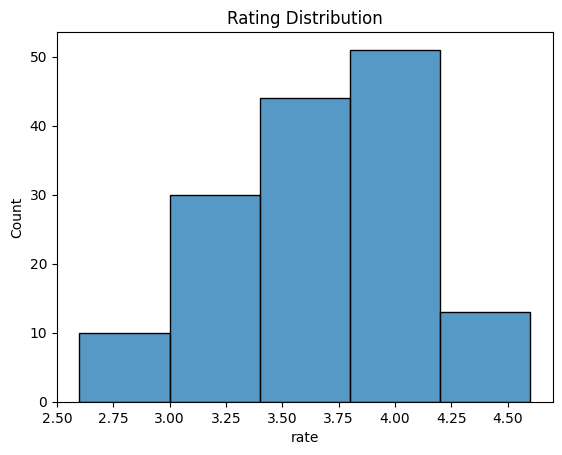

In [46]:
sns.histplot(data=df, x='rate',bins=5)
plt.title("Rating Distribution")
plt.show()

Majority restaurant getting rating in range 3.5 to 4.2 

### Average order spending by couples

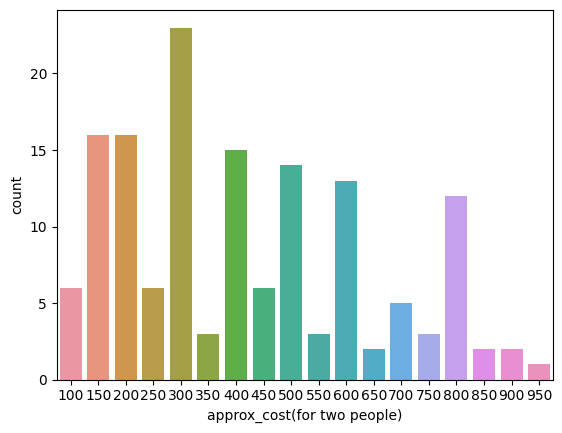

In [50]:
sns.countplot(x=df["approx_cost(for two people)"])
plt.show()


Majority of couples spend 300 Rs in restaurant

### Which mode recieve maximum rating

In [51]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Prefference of Rating based on Online or Offline')

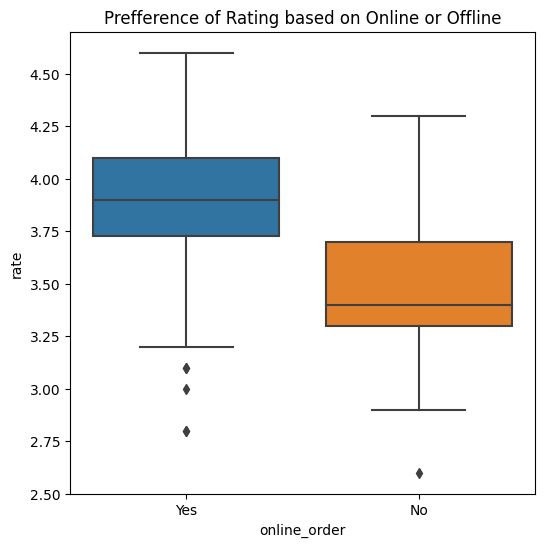

In [53]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="online_order",y="rate")
plt.title("Prefference of Rating based on Online or Offline")

Online order recieves better rating then Offline

### Preference based on category and Order type

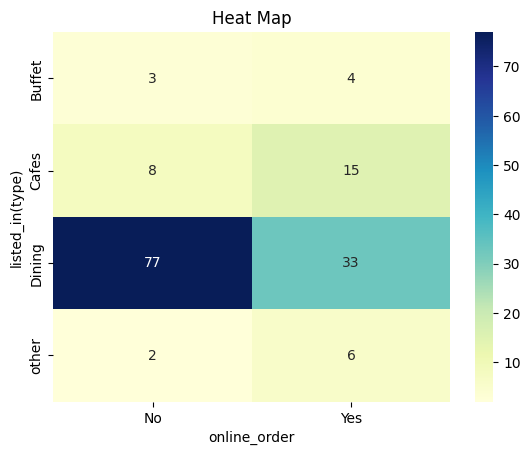

In [59]:
pivot_table=df.pivot_table(index='listed_in(type)',columns="online_order",
                            aggfunc='size',
                            fill_value=0)

sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heat Map")
plt.show()

Most of the orders in dinnig type of restaurant get offline order and rest of type get online order most